In [6]:
# Library Import

import pandas as pd
import numpy as np
from selenium import webdriver
from bs4 import BeautifulSoup
import requests
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from datetime import datetime, timedelta
import time
import re
import datetime
import os
import pickle
from urllib.request import urlopen
from Util.SE_Crawling import Crawling
import seaborn as sns

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt
from PIL import Image


### 1. 노동조합 동향 파악
Chrome Driver를 이용하여 특정 사이트의 기사 데이터를 추출함. </br>
아래의 예시는 민노총의 데이터를 이용하여 기사의 제목, 일시, 기사의 url을 10페이지까지 크롤링 함. </br>

현재 시도할 수 있는 것은 다음과 같음.
1. 기사 제목으로부터 특정 단어가 들어가는 경우 이를 '주요 기사'로 분류하고, 해당 url로 접속하여 전문을 요약하기.
2. ChatGPT와 같은 LLM을 이용하여, 기사 제목을 토대로 '주요 기사'를 추출하고, 해당 url로 접속하여 전문을 요약하기.

어려워 보이는 사항은 다음과 같음.
1. 자동으로 정리된 사진, PPT 등을 만드는 것. (자동으로 보고서가 산출되는 것은 Front-End관련 프로젝트가 결합되어야 할 것으로 보임)

In [2]:
# 크롤링 시 조절파라미터
df_2 = Crawling(20, 20, True, 'Test')


Chrome_Driver Start. 데이터 길이 = 20, 데이터 기간 = 20, 저장여부 = True
민노총-성명/보도 데이터 크롤링. Start.
민노총 기사데이터 크롤링. End.
조선일보-정치 기사데이터 크롤링. Start.
조선일보-정치 기사데이터 크롤링. End.
조선일보-사회 기사데이터 크롤링. Start.
조선일보-사회 기사데이터 크롤링. End.
매일노동뉴스-노동조합 기사데이터 크롤링. Start.
매일노동뉴스-노동조합 기사데이터 크롤링. End.
뉴시스-사회-노동 기사데이터 크롤링. Start.
뉴시스-사회-노동 기사데이터 크롤링. End.
전국건설노조-성명/보도 자료 크롤링. Start.
전국건설노조-성명/보도 자료 크롤링. End.
전국철도노동조합-성명/보도 자료 크롤링. Start.
전국철도노동조합-성명/보도 자료 크롤링. End.
전국철도노동조합-성명/보도 자료 크롤링. End.
전국철도노동조합-성명/보도 자료 크롤링. End.
전국철도노동조합-성명/보도 자료 크롤링. End.
전국철도노동조합-성명/보도 자료 크롤링. End.
전국철도노동조합-성명/보도 자료 크롤링. End.
전국철도노동조합-성명/보도 자료 크롤링. End.
전국철도노동조합-성명/보도 자료 크롤링. End.
전국철도노동조합-성명/보도 자료 크롤링. End.
전국철도노동조합-성명/보도 자료 크롤링. End.
전국철도노동조합-성명/보도 자료 크롤링. End.
전국철도노동조합-성명/보도 자료 크롤링. End.
전국철도노동조합-성명/보도 자료 크롤링. End.
전국철도노동조합-성명/보도 자료 크롤링. End.
전국철도노동조합-성명/보도 자료 크롤링. End.
전국철도노동조합-성명/보도 자료 크롤링. End.
전국철도노동조합-성명/보도 자료 크롤링. End.
전국철도노동조합-성명/보도 자료 크롤링. End.
전국철도노동조합-성명/보도 자료 크롤링. End.
전국철도노동조합-성명/보도 자료 크롤링. End.
화물연대본부-성명/보도 자료 크롤링. Start.
화물연대본부-성명/보

In [8]:
mark_1 = len(df_2[df_2.Marking == 1])
mark_2 = len(df_2[df_2.Marking == 2])
mark_3 = len(df_2[df_2.Marking == 3])
mark_4 = len(df_2[df_2.Marking == 4])
mark_5 = len(df_2[df_2.Marking == 5])

In [9]:
print(mark_1, mark_2, mark_3, mark_4, mark_5)

208 189 85 146 39


<AxesSubplot:xlabel='Marking', ylabel='Count'>

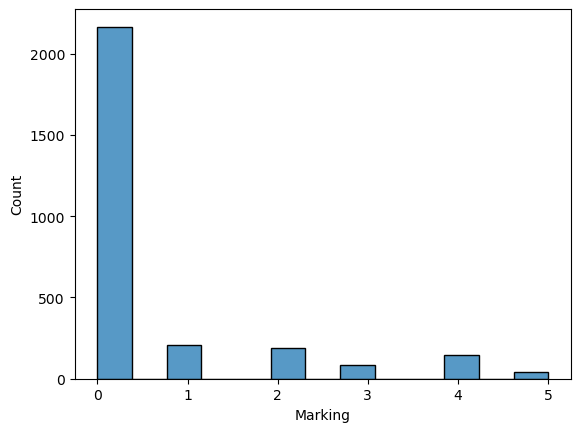

In [12]:
sns.histplot(data=df_2, x=df_2.Marking)

In [ ]:
seaborn.histplot(data=None, *, x=None, y=None, hue=None, weights=None, stat='count', bins='auto', binwidth=None, binrange=None, discrete=None, cumulative=False, common_bins=True, common_norm=True, multiple='layer', element='bars', fill=True, shrink=1, kde=False, kde_kws=None, line_kws=None, thresh=0, pthresh=None, pmax=None, cbar=False, cbar_ax=None, cbar_kws=None, palette=None, hue_order=None, hue_norm=None, color=None, log_scale=None, legend=True, ax=None, **kwargs)

In [ ]:
df[df['Title'].str.contains('노조|파업|탄압')]['Title']

0      [보도자료] 5.11 노동기본권 부정, 노조탄압, 노동자 죽이는 윤석열정권 퇴진 특...
3      [취재요청] 5.11 노동기본권 부정, 노조탄압, 노동자 죽이는 윤석열정권 퇴진 특...
5          [보도자료] 국제 노동계, 윤석열 정부 취임 1주년 맞아 노동탄압 규탄 성명 발표
107                      고용부, 노조의 건설현장 채용강요·노사 불법행위 집중감독
193                               “부정부패 근절하고, 노조탄압 중단하라”
198                              금속노조 ‘윤석열 정권 심판’ 31일 파업
201                        한전기술 노조, '탈원전 옹호' 엇박자 민주노총 탈퇴
203                   민주노총 건설노조 "노조 탄압 중단…경찰청장 사퇴·정권 퇴진"
207                 [속보]대법 "노조 동의 없는 취업규칙 변경 무효" 원심 파기환송
209                고용장관 "勞, 최소 의무가 탄압?…使에 '투명' 어떻게 말하나" 
213                  '노조회계 현장조사 거부' 37곳에 최대 500만원 과태료 부과
235                  계속되는 라이더 파업…배민 "현장 영업 차질 없어, 대화 지속"
238                    "尹정부 1년, '노조 때리기'만 진심…노동개혁 실패할 것"
239                     공공운수노조 "尹 정부와 공존 못 해…9~10월 공동파업"
Name: Title, dtype: object

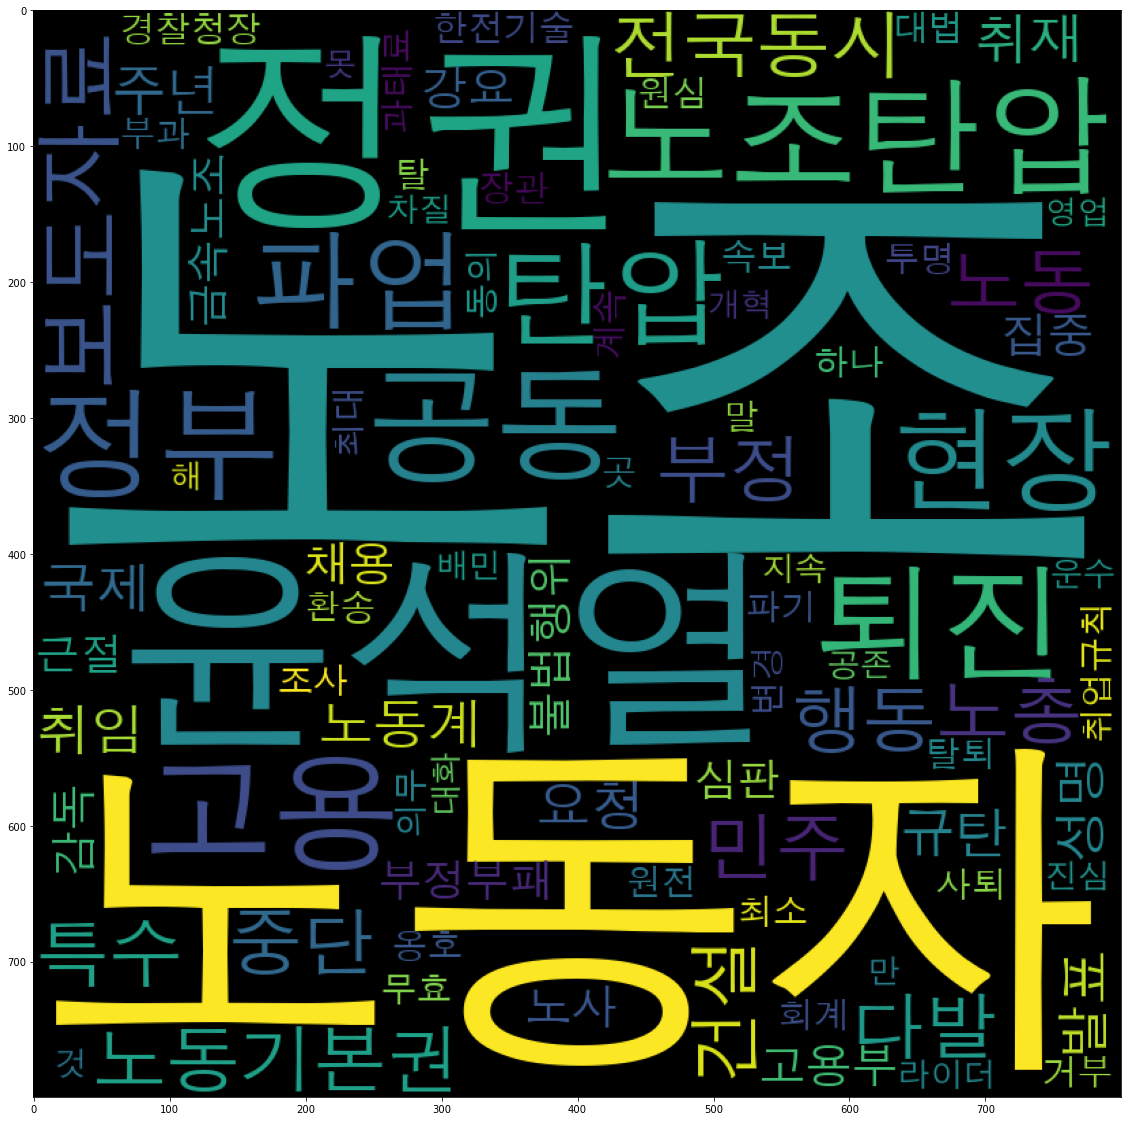

In [ ]:
okt = Okt()
words_list = []
for i in df[df['Title'].str.contains('노조|파업|탄압')]['Title']:
    nouns = okt.nouns(i) # 명사만 추출
    for j in nouns:
        words_list.append(j)

c = Counter(words_list) # 위에서 얻은 words를 처리하여 단어별 빈도수 형태의 딕셔너리 데이터를 구함

wc = WordCloud(font_path='AppleGothic', width=400, height=400, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(c)
plt.figure(figsize=(20,20))
plt.imshow(gen)
plt.savefig('./노조_관련_워드크라우드.png')

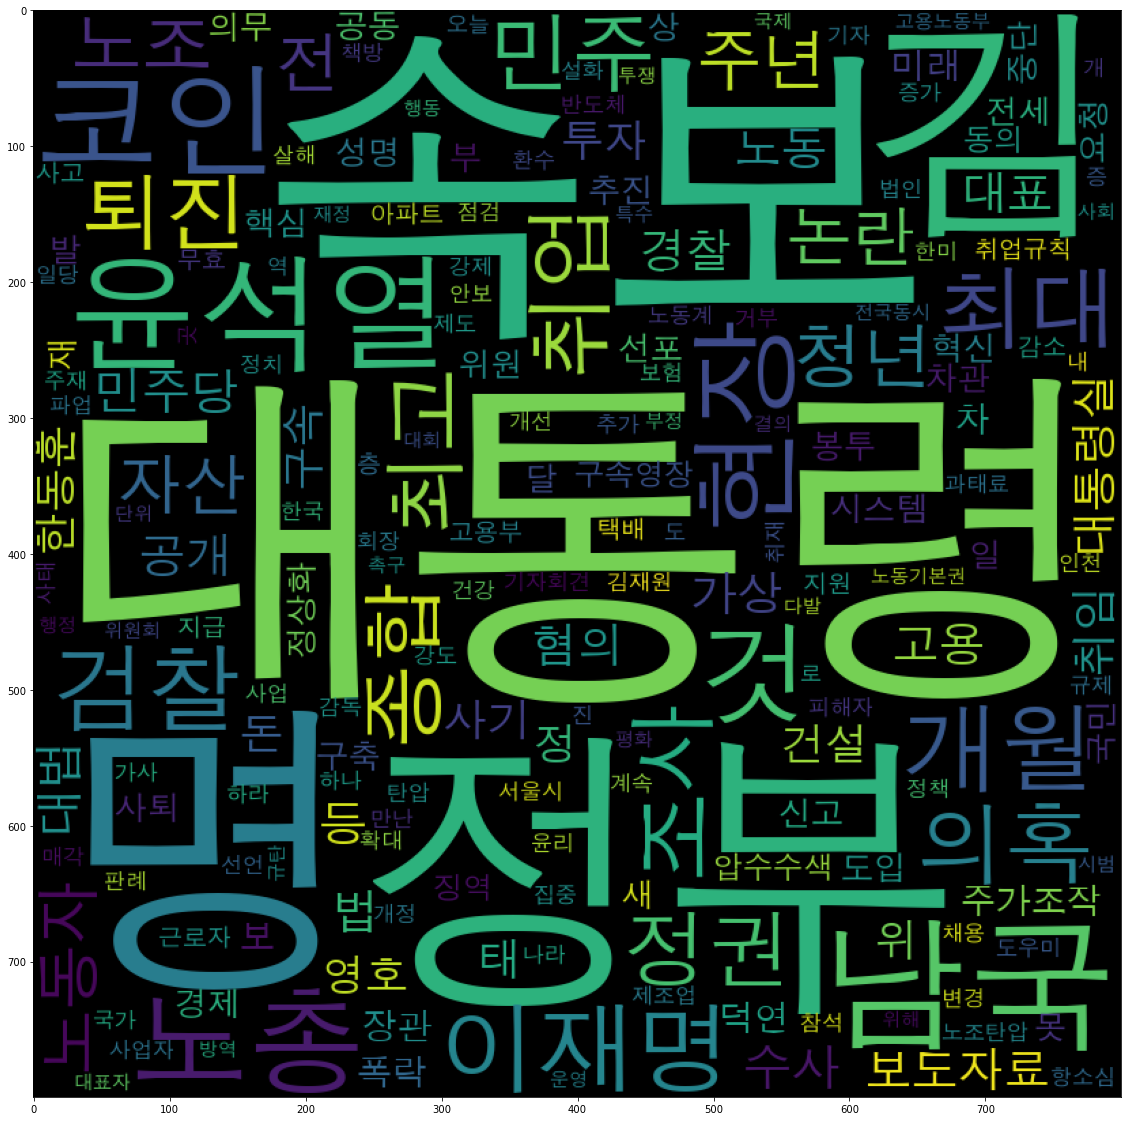

In [ ]:
okt = Okt()
words_list = []
for i in df['Title']:
    nouns = okt.nouns(i) # 명사만 추출
    for j in nouns:
        words_list.append(j)

c = Counter(words_list) # 위에서 얻은 words를 처리하여 단어별 빈도수 형태의 딕셔너리 데이터를 구함

wc = WordCloud(font_path='AppleGothic', width=400, height=400, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(c)
plt.figure(figsize=(20,20))
plt.imshow(gen)
plt.savefig('./전체_워드크라우드.png')

### 5. 평택지역 기후 파악

In [ ]:
# 기간 설정.
datetime_now = datetime.datetime.now().strftime("%Y%m%d%H")
datetime_7day_before = datetime.datetime.now() - timedelta(7)
datetime_7day_before = datetime_7day_before.strftime("%Y%m%d%H")
datetime_14day_after = datetime.datetime.now() + timedelta(14)
datetime_14day_after = datetime_14day_after.strftime("%Y%m%d%H")

# 크롤링할 부분 선택.
# 현재는 최근 7일 ~ 이후 14일의 단기예보 데이터를 출력함.

domain = 'https://apihub.kma.go.kr/api/typ01/url/fct_afs_dl.php?'
tm = f"reg=11B20606&tmfc1={datetime_7day_before}&tmfc2={datetime_14day_after}&disp=0&help=1&authKey="
auth = 'leUHz9DNQWylB8_QzcFszw'
url = domain + tm + auth


In [ ]:
res = requests.get(url)
print(res.text)

#START7777
#--------------------------------------------------------------------------------------------------
#  단기예보 육상 조회 [입력인수형태][예] ?reg=&tmfc1=2013121018&tmfc2=2013121106&disp=0&help=1
#--------------------------------------------------------------------------------------------------
#  1. REG_ID   : 예보구역코드
#  2. TM_FC    : 발표시각(년월일시분,KST)
#  3. TM_EF    : 발효시각(년월일시분,KST)
#  4. MOD      : 구간 (A01(24시간),A02(12시간))
#  5. NE       : 발효번호
#  6. STN      : 발표관서
#  7. C        : 발표코드
#  8. MAN_ID   : 예보관ID
#  9. MAN_FC   : 예보관명
# 10. W1       : 풍향1(16방위)
# 11. T        : 풍향경향(1:-, 2:후)
# 12. W2       : 풍향2(16방위)
# 13. TA       : 기온
# 14. ST       : 강수확률(%)
# 15. SKY      : 하늘상태코드 (DB01(맑음),DB02(구름조금),DB03(구름많음),DB04(흐림))
# 16. PREP     : 강수유무코드 (1(비),2(비/눈),4(눈/비),3(눈))
# 17. WF       : 예보
#--------------------------------------------------------------------------------------------------
# REG_ID TM_FC        TM_EF        MOD NE STN C MAN_ID       MAN_FC     W1 T W2  TA  ST SKY  PREP W